## pdf의 독립
- 두 확률변수 X, Y가 있을때, X의 값이 달라지면 Y의 조건부 분포가 달라지는 것 : 상관관계가 있다.
- 즉, 앞선 내용(결합 확률분포)에서 한 확률변수를 특정값으로 고정했을 때 생기는 분포의 단면의 모양이 달라지는 것을 의미한다.
- 두 확률변수 X, Y가 있을때, X의 값이 달라지는데 Y의 조건부 분포가 달라지지 않는다면 두 확률변수 X, Y는 서로 독립이라고 한다.

$$ f_{XY}(x, y) = f_X(x)f_Y(y) $$

##### 1. 반복시행
$$ f(x_1, x_2, x_3, \cdots, x_N ) = \prod_{i=1}^N f(x_i) $$  

이는 $ X $에서 나온 $ x_1, x_2 $는 개별 독립적인 확률변수로 볼 수 있고, 각각 $ x_1, x_2 $ 을 스칼라 확률변수로 볼 수 있고, $ X $를 이들이 모여있는 벡터 확률변수로 볼 수 있다.

##### 2. 독립일 때 Conditional probability distribution
$$ f_{X \mid Y} (x | y) = \dfrac{f_{XY}(x, y)}{f_{Y}(y)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{Y}(y)} = f_{X}(x) $$

$$ f_{Y \mid X} (y | x) = \dfrac{f_{XY}(x, y)}{f_{X}(x)} = \dfrac{f_{X}(x) f_{Y}(y)}{f_{X}(x)} = f_{Y}(y) $$

 $y_1$일 때와 $y_2$일 때의 조건부 확률 분포 $f(x \mid y_1)$과 $f(x \mid y_2)$이 같다

In [1]:
# example : pmf
np.set_printoptions(precision=4)
pmf1 = np.array([[1, 2, 3, 2, 1],
                 [2, 4, 6, 4, 2],
                 [4, 8,12, 8, 4],
                 [2, 4, 6, 4, 2],
                 [1, 2, 3, 2, 1]])
pmf1 = pmf1/pmf1.sum()
pmf1

array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
       [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
       [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]])

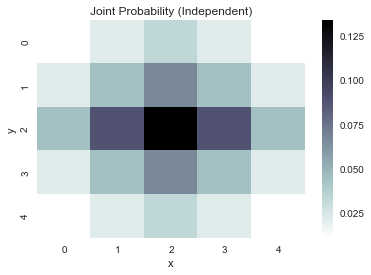

In [2]:
# 이산확률변수 X 이산확률변수의 조합이므로 heatmap을 그려본다.
sns.heatmap(pmf1, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Independent)")
plt.show()

In [4]:
# pmf는 marginal x와 marginal y의 곱으로 표현된다.
pmf1_marginal_x = pmf1.sum(axis=0)
pmf1_marginal_y = pmf1.sum(axis=1)

pmf = pmf1_marginal_x * pmf1_marginal_y[:, np.newaxis]
pmf, pmf.sum()

(array([[ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111],
        [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
        [ 0.0444,  0.0889,  0.1333,  0.0889,  0.0444],
        [ 0.0222,  0.0444,  0.0667,  0.0444,  0.0222],
        [ 0.0111,  0.0222,  0.0333,  0.0222,  0.0111]]), 1.0)

In [5]:
pmf1_marginal_x

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [6]:
pmf1_marginal_y

array([ 0.1,  0.2,  0.4,  0.2,  0.1])

In [7]:
# Y값을 바꾸어도 조건부확률은 그대로다.
# P(x)와 같다. 스케일링 때문에
cond_x_y0 = pmf1[0, :]/pmf1_marginal_y[0]
cond_x_y0

array([ 0.1111,  0.2222,  0.3333,  0.2222,  0.1111])

In [16]:
cond_x_y1 = pmf1[1, :]/pmf1_marginal_y[1]
cond_x_y1

array([0.1111, 0.2222, 0.3333, 0.2222, 0.1111])

In [17]:
# 독립조건이 성립하지 않는 경우를 보자
pmf2 = np.array([[0, 0, 0, 1, 1],
                 [0, 0, 2, 3, 1],
                 [0, 2, 5, 2, 0],
                 [1, 3, 2, 0, 0],
                 [1, 1, 0, 0, 0]])
pmf2 = pmf2/pmf2.sum()
pmf2

array([[0.  , 0.  , 0.  , 0.04, 0.04],
       [0.  , 0.  , 0.08, 0.12, 0.04],
       [0.  , 0.08, 0.2 , 0.08, 0.  ],
       [0.04, 0.12, 0.08, 0.  , 0.  ],
       [0.04, 0.04, 0.  , 0.  , 0.  ]])

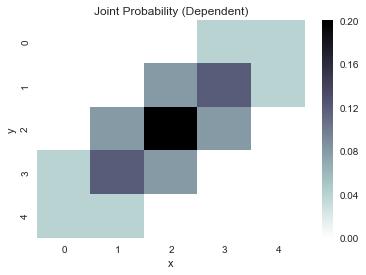

In [18]:
sns.heatmap(pmf2, cmap=mpl.cm.bone_r)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Joint Probability (Dependent)")
plt.show()

In [19]:
pmf2_marginal_x = pmf2.sum(axis=0)
pmf2_marginal_y = pmf2.sum(axis=1)

cond_x_y0 = pmf2[0,:]/pmf2_marginal_y[0]
cond_x_y0

array([0. , 0. , 0. , 0.5, 0.5])

In [20]:
cond_x_y1 = pmf2[1, :]/pmf2_marginal_y[1]
cond_x_y1

array([0.    , 0.    , 0.3333, 0.5   , 0.1667])

##### 3. 모멘트
$$ \text{E}[XY] = \text{E}[X]\text{E}[Y] $$

$$ \text{E}[(X - \mu_X)(Y-\mu_Y)] = 0 $$

$$ \text{Var}[X+Y] = \text{Var}[X] + \text{Var}[Y] $$